In [1]:
#import statements
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import scipy.stats as stats
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, QuantileTransformer, PowerTransformer,RobustScaler,MinMaxScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from statsmodels.formula.api import ols


import env
import get_function as gf

**Aquire**

In [2]:
# Import from zillow
df = gf.get_zillow_data()

In [3]:
df.head()

,parcelid,logerror,transactiondate,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,12177905,-0.103410,2017-01-01,2288172,12177905,NaN,None,None,3.0,4.0,...,NaN,None,108918.0,145143.0,2016.0,36225.0,1777.51,None,NaN,6.037300e+13
1,12095076,-0.001011,2017-01-01,781532,12095076,1.0,None,None,3.0,4.0,...,NaN,None,276684.0,773303.0,2016.0,496619.0,9516.26,None,NaN,6.037461e+13
2,12069064,0.101723,2017-01-01,870991,12069064,NaN,None,None,1.0,2.0,...,NaN,None,18890.0,218552.0,2016.0,199662.0,2366.08,None,NaN,6.037302e+13
3,12790562,-0.040966,2017-01-02,1246926,12790562,NaN,None,None,3.0,4.0,...,NaN,None,177527.0,220583.0,2016.0,43056.0,3104.19,None,NaN,6.037500e+13
4,11104527,0.005963,2017-01-02,1639362,11104527,1.0,None,None,3.0,4.0,...,NaN,None,271715.0,430108.0,2016.0,158393.0,6103.36,None,NaN,6.037920e+13


In [4]:
df.shape

(33701, 62)

**Prepare**

In [5]:
# dropp columns with less than 60% of data non-null and rows with more than 75% of data non-null
df = gf.handle_missing_values(df, prop_required_column = .6, prop_required_row = .75)

In [6]:
df.isnull().sum()

parcelid                          0
logerror                          0
transactiondate                   0
id                                0
parcelid                          0
bathroomcnt                       0
bedroomcnt                        0
buildingqualitytypeid           127
calculatedbathnbr                 0
calculatedfinishedsquarefeet      0
finishedsquarefeet12              0
fips                              0
fullbathcnt                       0
heatingorsystemtypeid           536
latitude                          0
longitude                         0
lotsizesquarefeet               304
propertycountylandusecode         0
propertylandusetypeid             0
propertyzoningdesc               68
rawcensustractandblock            0
regionidcity                    694
regionidcounty                    0
regionidzip                      12
roomcnt                           0
unitcnt                           0
yearbuilt                         7
structuretaxvaluedollarcnt  

In [7]:
df.shape

(33701, 33)

In [8]:
# removing unnessesery columns
df = gf.remove_columns(df, ['roomcnt','assessmentyear','unitcnt','regionidzip','regionidcounty','propertylandusetypeid','propertycountylandusecode','fullbathcnt','calculatedbathnbr','rawcensustractandblock','finishedsquarefeet12','parcelid','transactiondate','id','regionidcity','buildingqualitytypeid','heatingorsystemtypeid','propertyzoningdesc','censustractandblock'])

In [9]:
df.isnull().sum()

logerror                          0
bathroomcnt                       0
bedroomcnt                        0
calculatedfinishedsquarefeet      0
fips                              0
latitude                          0
longitude                         0
lotsizesquarefeet               304
yearbuilt                         7
structuretaxvaluedollarcnt       60
taxvaluedollarcnt                 0
landtaxvaluedollarcnt             0
taxamount                         4
dtype: int64

In [10]:
df.shape

(33701, 13)

In [11]:
df = df.rename(columns={'lotsizesquarefeet':'lot_square_feet','calculatedfinishedsquarefeet':'home_square_feet', 'logerror': 'target','bathroomcnt': 'bathroom', 'bedroomcnt': 'bedroom','structuretaxvaluedollarcnt':'structure_value','taxvaluedollarcnt': 'total_value','landtaxvaluedollarcnt':'land_value','taxamoun':'tax_amount','taxamount':'tax_amount','yearbuilt':'year_built'})

In [12]:
# Covert year built into age years

df['age']= 2017 - df.year_built

In [13]:
# Drop year built because we added age column

df.drop(columns='year_built',inplace=True)

In [14]:
# Delete rows where tax value amount does not equal land value + structure value

np.where(df.total_value - (df.land_value + df.structure_value) != 0)

(array([  397,   875,   878,   940,   959,  1203,  1278,  1324,  1726,
         1750,  1927,  2370,  4472,  4703,  5251,  5463,  5514,  5723,
         5783,  6108,  6887,  7005,  8739,  9386, 10622, 11406, 11585,
        12340, 12850, 13048, 13655, 13739, 14337, 14865, 15060, 18902,
        19494, 19762, 20312, 20614, 20917, 21217, 21285, 21661, 22036,
        22183, 22185, 23676, 25773, 26889, 27696, 28695, 31024, 31553,
        31708, 32148, 32171, 32679, 33018, 33032]),)

In [15]:
df.loc[31024]

# 397, 878,   940,   959,  1203,  1278,  1324,  1726,
# 1750,  1927,  2370,  4472,  4703,  5251,  5463,  5514,  5723,
# 5783,  6108,  6887,  7005,  8739,  9386, 10622, 11406, 11585,
# 12340, 12850, 13048, 13655, 13739, 14337, 14865, 15060, 18902,
# 19494, 19762, 20312, 20614, 20917, 21217, 21285, 21661, 22036,
# 22183, 22185, 23676, 25773, 26889, 27696, 28695, 31024, 31553,
# 31708, 32148, 32171, 32679, 33018, 33032]

target              8.249599e-02
bathroom            1.000000e+00
bedroom             3.000000e+00
home_square_feet    1.460000e+03
fips                6.037000e+03
latitude            3.411261e+07
longitude          -1.180782e+08
lot_square_feet     9.099000e+03
structure_value              NaN
total_value         7.898640e+05
land_value          7.898640e+05
tax_amount          9.132300e+03
age                 6.200000e+01
Name: 31024, dtype: float64

In [16]:
df.drop([397,   875,   878,   940,   959,  1203,  1278,  1324,  1726,
         1750,  1927,  2370,  4472,  4703,  5251,  5463,  5514,  5723,
         5783,  6108,  6887,  7005,  8739,  9386, 10622, 11406, 11585,
        12340, 12850, 13048, 13655, 13739, 14337, 14865, 15060, 18902,
        19494, 19762, 20312, 20614, 20917, 21217, 21285, 21661, 22036,
        22183, 22185, 23676, 25773, 26889, 27696, 28695, 31024, 31553,
        31708, 32148, 32171, 32679, 33018, 33032],axis=0,inplace=True)

In [17]:
df.isnull().sum()

target                0
bathroom              0
bedroom               0
home_square_feet      0
fips                  0
latitude              0
longitude             0
lot_square_feet     291
structure_value       0
total_value           0
land_value            0
tax_amount            3
age                   7
dtype: int64

In [18]:
# Split data (train & test)

train, test = gf.split_my_data(df, .80, 123)

In [19]:
# impute lot_square_feet,structure_value, and tax_amount for the mean

train = gf.imputer_9000(train,['lot_square_feet','structure_value','tax_amount', 'age'],'mean')
test = gf.imputer_9000(test,['lot_square_feet','structure_value','tax_amount', 'age'],'mean')

In [20]:
train['home_value_square_footage'] = train.structure_value/train.home_square_feet
train['land_value_square_footage'] = train.land_value/train.lot_square_feet

test['home_value_square_footage'] = test.structure_value/test.home_square_feet
test['land_value_square_footage'] = test.land_value/test.lot_square_feet

In [68]:
train.isnull().sum()

target                       0
fips                         0
home_value_square_footage    0
land_value_square_footage    0
age                          0
latitude                     0
longitude                    0
bathroom                     0
bedroom                      0
home_square_feet             0
lot_square_feet              0
structure_value              0
total_value                  0
land_value                   0
tax_amount                   0
cluster                      0
dtype: int64

In [22]:
test.isnull().sum()

target                       0
bathroom                     0
bedroom                      0
home_square_feet             0
fips                         0
latitude                     0
longitude                    0
lot_square_feet              0
structure_value              0
total_value                  0
land_value                   0
tax_amount                   0
age                          0
home_value_square_footage    0
land_value_square_footage    0
dtype: int64

In [23]:
train.head()

,target,bathroom,bedroom,home_square_feet,fips,latitude,longitude,lot_square_feet,structure_value,total_value,land_value,tax_amount,age,home_value_square_footage,land_value_square_footage
33257,0.005565,3.0,4.0,1673.0,6037.0,33985663.0,-118229161.0,3000.0,126192.0,227194.0,101002.0,3505.67,18.0,75.428571,33.667333
8306,0.452906,1.0,3.0,950.0,6037.0,33941666.0,-118235240.0,3251.0,116496.0,191571.0,75075.0,2495.60,52.0,122.627368,23.092894
25859,0.020907,2.0,3.0,1256.0,6037.0,34209673.0,-118628052.0,7525.0,46269.0,84214.0,37945.0,1137.12,56.0,36.838376,5.042525
30676,0.012864,2.0,3.0,1984.0,6037.0,34129558.0,-117719482.0,15368.0,242729.0,683452.0,440723.0,9630.60,40.0,122.343246,28.677967
30916,0.007597,2.0,4.0,2016.0,6037.0,34013213.0,-117863106.0,7595.0,179535.0,223522.0,43987.0,2839.42,40.0,89.055060,5.791573


In [24]:
test.head()

,target,bathroom,bedroom,home_square_feet,fips,latitude,longitude,lot_square_feet,structure_value,total_value,land_value,tax_amount,age,home_value_square_footage,land_value_square_footage
33106,-0.027917,3.0,5.0,3083.0,6037.0,34671833.0,-118084245.0,11565.0,250104.0,309853.0,59749.0,4751.76,4.0,81.123581,5.166364
535,0.008490,1.0,3.0,1115.0,6037.0,33978427.0,-118063427.0,5697.0,96432.0,292670.0,196238.0,3732.85,67.0,86.486099,34.445849
6513,-0.034321,3.0,6.0,2176.0,6037.0,34032118.0,-118303539.0,7184.0,159154.0,424413.0,265259.0,5212.80,95.0,73.140625,36.923580
25153,-0.114455,2.0,2.0,1385.0,6037.0,34010163.0,-118309306.0,5876.0,29632.0,71701.0,42069.0,960.64,105.0,21.394946,7.159462
14729,0.070176,2.0,2.0,2209.0,6037.0,34043071.0,-118493656.0,9041.0,72049.0,228604.0,156555.0,3190.31,91.0,32.616116,17.316115


In [25]:
# Scaling dataframe in two ways

In [26]:
# Scale age, latitude, and longitude using MinMax scaler - why (to presrve distance better)

train = gf.scaler_min_max(train, ['age', 'latitude', 'longitude'])
test = gf.scaler_min_max(test, ['age', 'latitude', 'longitude'])

In [27]:
# Scale bathroom, bedroom, home_square_feet, lot_square_feet, structure_value, total_value, land_value, tax_amount using uniform scaler

# Scale columns using Uniform scaler (to smooth out the distribution and handle outliers)

train = gf.uniform_scaler(train,['bathroom', 'bedroom', 'home_square_feet', 'lot_square_feet', 'structure_value', 'total_value', 'land_value', 'tax_amount'])
test = gf.uniform_scaler(test,['bathroom', 'bedroom', 'home_square_feet', 'lot_square_feet', 'structure_value', 'total_value', 'land_value', 'tax_amount'])

In [28]:
train[train.target > 0].mean()

target                          0.081899
fips                         6037.004416
home_value_square_footage      90.518032
land_value_square_footage      40.968673
age                             0.418692
latitude                        0.526978
longitude                       0.524213
bathroom                        0.488470
bedroom                         0.515254
home_square_feet                0.518310
lot_square_feet                 0.506307
structure_value                 0.507789
total_value                     0.507428
land_value                      0.505919
tax_amount                      0.506962
dtype: float64

In [29]:
train[train.target < 0].mean()

target                         -0.068046
fips                         6037.003676
home_value_square_footage      90.428961
land_value_square_footage      39.519948
age                             0.433634
latitude                        0.530344
longitude                       0.528297
bathroom                        0.448830
bedroom                         0.481751
home_square_feet                0.477126
lot_square_feet                 0.491834
structure_value                 0.490066
total_value                     0.490615
land_value                      0.492507
tax_amount                      0.491223
dtype: float64

In [30]:
train.target.mean()

0.015217332551863352

In [31]:
train[train.target > 0].count()

target                       14944
fips                         14944
home_value_square_footage    14944
land_value_square_footage    14944
age                          14944
latitude                     14944
longitude                    14944
bathroom                     14944
bedroom                      14944
home_square_feet             14944
lot_square_feet              14944
structure_value              14944
total_value                  14944
land_value                   14944
tax_amount                   14944
dtype: int64

In [32]:
train[train.target < 0].count()

target                       11968
fips                         11968
home_value_square_footage    11968
land_value_square_footage    11968
age                          11968
latitude                     11968
longitude                    11968
bathroom                     11968
bedroom                      11968
home_square_feet             11968
lot_square_feet              11968
structure_value              11968
total_value                  11968
land_value                   11968
tax_amount                   11968
dtype: int64

In [72]:
train.target[train.target > 0].count() /(train.target[train.target > 0].count() + train.target[train.target < 0].count())

0.5552913198573127

Differinces in over and underestimation

over mean = .081

over %56

under mean = -.0680

under %44


In [34]:
stats.ttest_ind(train[train.target < 0].mean(),train[train.target > 0].mean())

Ttest_indResult(statistic=-0.00021801657840273504, pvalue=0.9998275938430903)

There is no significant differince in the overestimations and underestimations

In [74]:
train['absolute_target']= train.target.abs()

In [75]:
train['target','absolute_target'].head(25)

KeyError: ('target', 'absolute_target')

In [36]:
plt.figure(figsize=(12,12))
sns.heatmap(train.corr(), cmap='RdYlBu', annot=True, center=0)

In [38]:
# plt.figure(figsize=(22,22))
# sns.pairplot(train[['target', 'home_value_square_footage','land_value_square_footage']])
# plt.show()

home_value_square_footage and land_value_square_foortage show a correlation with logerror 

Going to try correlating home_value_square_footage and land_value_square_foortage  with longitude and latitude and see if a useful patrern emerges

   k           sse
0  1  1.065533e+08
1  2  5.687191e+07
2  3  3.234598e+07
3  4  2.060494e+07
4  5  1.331438e+07
5  6  9.444172e+06
6  7  7.102937e+06
7  8  5.408635e+06
8  9  4.393531e+06


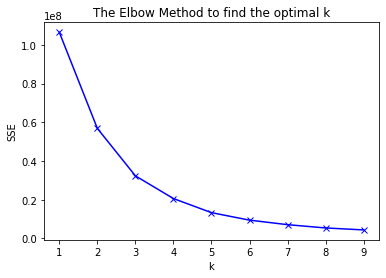

In [39]:
ks = range(1,10)
sse = []
for k in ks:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(train[['home_value_square_footage', 'longitude', 'latitude']])

    # inertia: Sum of squared distances of samples to their closest cluster center.
    sse.append(kmeans.inertia_)

print(pd.DataFrame(dict(k=ks, sse=sse)))

plt.plot(ks, sse, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('The Elbow Method to find the optimal k')
plt.show()

We are going to look at models where k = 3, 4, or 5

[[ 58.02583499   0.54725506   0.52568753]
 [129.11691225   0.49842454   0.53627872]
 [362.36330027   0.38850164   0.47434598]]


target                                                              \
           count      mean       std       min       25%       50%       75%   
cluster                                                                        
0        16512.0  0.019341  0.171813 -4.655420 -0.029242  0.006748  0.043341   
1         9830.0  0.009099  0.158652 -1.738639 -0.028781  0.004939  0.038105   
2          570.0  0.001281  0.224293 -2.175696 -0.034279  0.017214  0.064267   

                      fips               ... tax_amount            \
              max    count         mean  ...        75%       max   
cluster                                  ...                        
0        3.100913  16512.0  6037.005329  ...   0.546021  0.991486   
1        5.262999   9830.0  6037.002238  ...   0.878041  0.993188   
2        2.069414    570.0  6037.000000  ...   0.990114  1.000000   

        absolute_target                                                    \
                  count      mean       std       min       25%       50%   
cluster                                                                     
0               16512.0  0.078970  0.153809  0.000003  0.015828  0.036554   
1                9830.0  0.068315  0.143478  0.000007  0.014974  0.034018   
2                 570.0  0.110170  0.195321  0.000013  0.024298  0.052839   

                             
              75%       max  
cluster                      
0        0.081906  4.655420  
1        0.071147  5.262999  
2        0.110816  2.175696  

[3 rows x 128 columns]

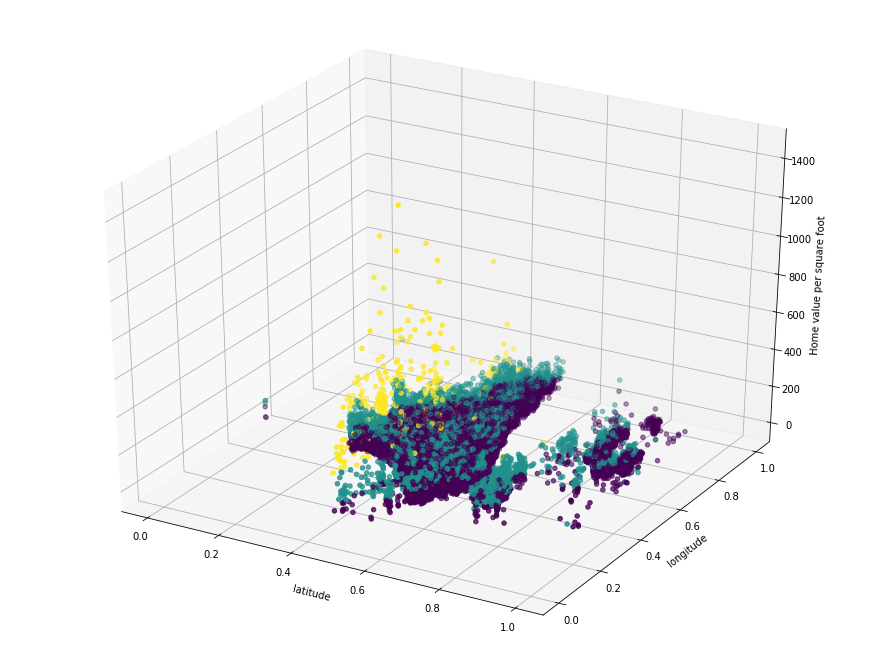

In [40]:
X = train[['home_value_square_footage', 'longitude', 'latitude']]

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

centers = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
print(kmeans.cluster_centers_)

%matplotlib inline

fig = plt.figure(figsize=(12, 9))
ax = Axes3D(fig)

ax.scatter(X.latitude,X.longitude,X.home_value_square_footage, c=kmeans.labels_)
ax.set(xlabel='latitude', ylabel='longitude', zlabel='Home value per square foot')

train['cluster'] = kmeans.labels_

train.groupby('cluster').describe()

[[1.06084646e+02 5.23347398e-01 5.47076048e-01]
 [4.81649480e+01 5.45246480e-01 5.14534243e-01]
 [2.10368520e+02 4.41861800e-01 5.00893053e-01]
 [5.49541789e+02 3.55505051e-01 4.70223521e-01]]


target                                                              \
           count      mean       std       min       25%       50%       75%   
cluster                                                                        
0        12584.0  0.011806  0.146031 -1.738639 -0.026882  0.004721  0.036746   
1        12124.0  0.020921  0.182036 -4.655420 -0.030487  0.007623  0.046689   
2         2054.0  0.004191  0.192625 -1.702338 -0.036575  0.007658  0.049326   
3          150.0 -0.008554  0.338565 -2.175696 -0.052709  0.021616  0.072871   

                      fips               ... tax_amount            \
              max    count         mean  ...        75%       max   
cluster                                  ...                        
0        3.394544  12584.0  6037.003497  ...   0.802927  0.993188   
1        3.100913  12124.0  6037.003629  ...   0.445185  0.991486   
2        5.262999   2054.0  6037.010711  ...   0.970304  0.997639   
3        2.069414    150.0  6037.000000  ...   0.990986  1.000000   

        absolute_target                                                    \
                  count      mean       std       min       25%       50%   
cluster                                                                     
0               12584.0  0.064427  0.131579  0.000006  0.013890  0.032287   
1               12124.0  0.084780  0.162439  0.000003  0.016958  0.038617   
2                2054.0  0.085688  0.172557  0.000007  0.019085  0.043550   
3                 150.0  0.157706  0.299436  0.000429  0.034353  0.065532   

                             
              75%       max  
cluster                      
0        0.067634  3.394544  
1        0.087996  4.655420  
2        0.094511  5.262999  
3        0.138815  2.175696  

[4 rows x 128 columns]

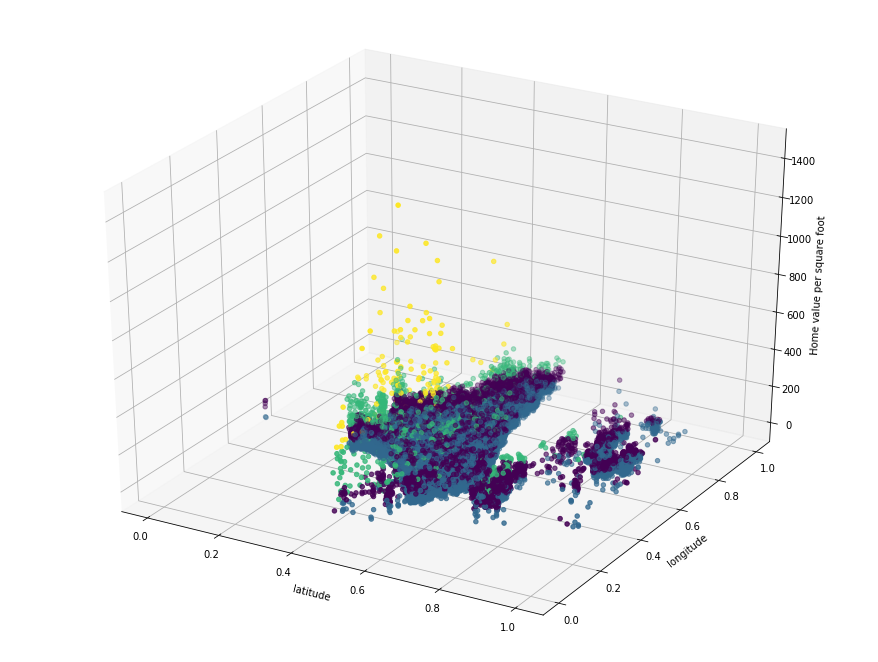

In [41]:
X = train[['home_value_square_footage', 'longitude', 'latitude']]

kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

centers = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
print(kmeans.cluster_centers_)

%matplotlib inline

fig = plt.figure(figsize=(12, 9))
ax = Axes3D(fig)

ax.scatter(X.latitude,X.longitude,X.home_value_square_footage, c=kmeans.labels_)
ax.set(xlabel='latitude', ylabel='longitude', zlabel='Home value per square foot')

train['cluster'] = kmeans.labels_

train.groupby('cluster').describe()

[[9.25891600e+01 5.39800237e-01 5.48881247e-01]
 [3.09278619e+02 3.96553875e-01 4.76754982e-01]
 [1.56603788e+02 4.69521649e-01 5.25182449e-01]
 [4.19900007e+01 5.41461901e-01 5.07018868e-01]
 [7.40214451e+02 3.64830524e-01 4.78387842e-01]]


target                                                              \
           count      mean       std       min       25%       50%       75%   
cluster                                                                        
0        12476.0  0.013696  0.144968 -1.623253 -0.026370  0.005076  0.037136   
1          602.0  0.004773  0.222605 -2.175696 -0.034920  0.016476  0.064828   
2         4146.0  0.005349  0.166132 -1.738639 -0.031302  0.005520  0.041475   
3         9632.0  0.022530  0.191598 -4.655420 -0.032102  0.007684  0.048266   
4           56.0 -0.060786  0.231311 -1.019561 -0.056040  0.015172  0.047437   

                      fips               ... tax_amount            \
              max    count         mean  ...        75%       max   
cluster                                  ...                        
0        3.394544  12476.0  6037.003527  ...   0.738771  0.993188   
1        2.069414    602.0  6037.000000  ...   0.989906  1.000000   
2        5.262999   4146.0  6037.005306  ...   0.929781  0.992252   
3        3.100913   9632.0  6037.004568  ...   0.363626  0.991486   
4        0.244792     56.0  6037.000000  ...   0.991389  0.999529   

        absolute_target                                                    \
                  count      mean       std       min       25%       50%   
cluster                                                                     
0               12476.0  0.064689  0.130454  0.000006  0.014083  0.032203   
1                 602.0  0.107064  0.195177  0.000011  0.024298  0.053220   
2                4146.0  0.072640  0.149501  0.000007  0.015816  0.037026   
3                9632.0  0.089105  0.171105  0.000003  0.017426  0.040336   
4                  56.0  0.131206  0.199346  0.000429  0.030359  0.052918   

                             
              75%       max  
cluster                      
0        0.067978  3.394544  
1        0.108230  2.175696  
2        0.077493  5.262999  
3        0.092082  4.655420  
4        0.134748  1.019561  

[5 rows x 128 columns]

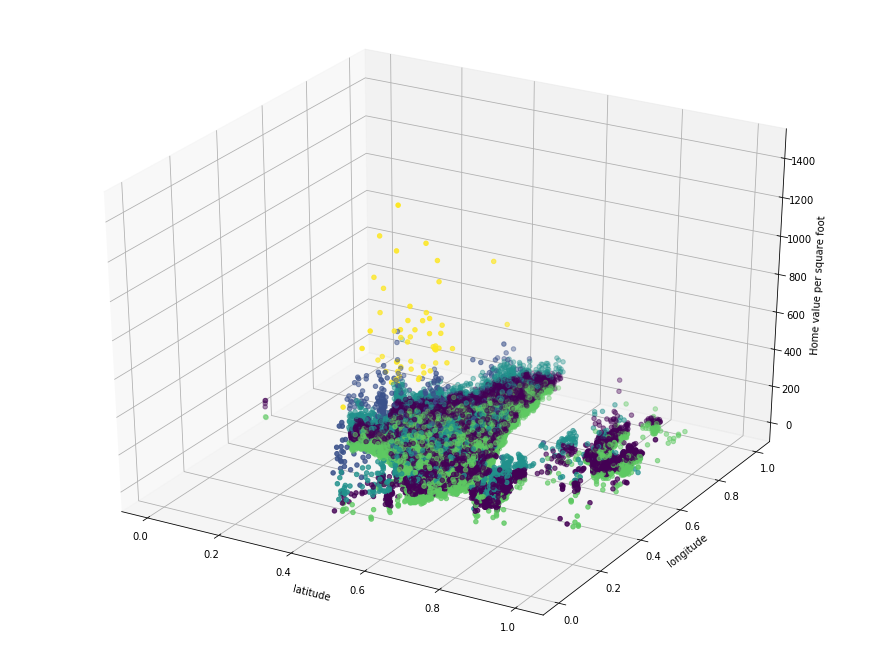

In [42]:
X = train[['home_value_square_footage', 'longitude', 'latitude']]

kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

centers = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
print(kmeans.cluster_centers_)

%matplotlib inline

fig = plt.figure(figsize=(12, 9))
ax = Axes3D(fig)

ax.scatter(X.latitude,X.longitude,X.home_value_square_footage, c=kmeans.labels_)
ax.set(xlabel='latitude', ylabel='longitude', zlabel='Home value per square foot')

train['cluster'] = kmeans.labels_

train.groupby('cluster').describe()

In [43]:
train = train.drop(columns=['absolute_target','cluster'])

   k           sse
0  1  1.090859e+08
1  2  5.551515e+07
2  3  3.222185e+07
3  4  1.906414e+07
4  5  1.274851e+07
5  6  8.904949e+06
6  7  6.591644e+06
7  8  4.888659e+06
8  9  3.819745e+06


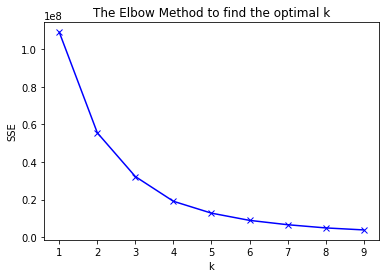

In [44]:
ks = range(1,10)
sse = []
for k in ks:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(train[['land_value_square_footage', 'longitude', 'latitude']])

    # inertia: Sum of squared distances of samples to their closest cluster center.
    sse.append(kmeans.inertia_)

print(pd.DataFrame(dict(k=ks, sse=sse)))

plt.plot(ks, sse, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('The Elbow Method to find the optimal k')
plt.show()

[[2.66143040e+01 5.35541235e-01 5.35928452e-01]
 [6.85817789e+02 3.80534051e-01 4.05071725e-01]
 [1.54705953e+02 4.34049109e-01 4.56787427e-01]]


target                                                              \
           count      mean       std       min       25%       50%       75%   
cluster                                                                        
0        24446.0  0.016480  0.161457 -2.331727 -0.028716  0.005928  0.041248   
1           99.0  0.022386  0.197343 -0.696273 -0.037158  0.019148  0.068309   
2         2367.0  0.001879  0.227688 -4.655420 -0.036298  0.010121  0.049124   

                      fips               ... land_value           tax_amount  \
              max    count         mean  ...        75%       max      count   
cluster                                  ...                                   
0        3.394544  24446.0  6037.002700  ...   0.684928  0.991891    24446.0   
1        1.310249     99.0  6037.222222  ...   0.990580  1.000000       99.0   
2        5.262999   2367.0  6037.009294  ...   0.966555  0.997971     2367.0   

                                                                               
             mean       std       min       25%       50%       75%       max  
cluster                                                                        
0        0.460828  0.271240  0.000000  0.227484  0.455376  0.687388  0.994397  
1        0.970410  0.034269  0.758591  0.962606  0.983390  0.990442  1.000000  
2        0.884464  0.117483  0.002316  0.850926  0.918304  0.963650  0.999529  

[3 rows x 120 columns]

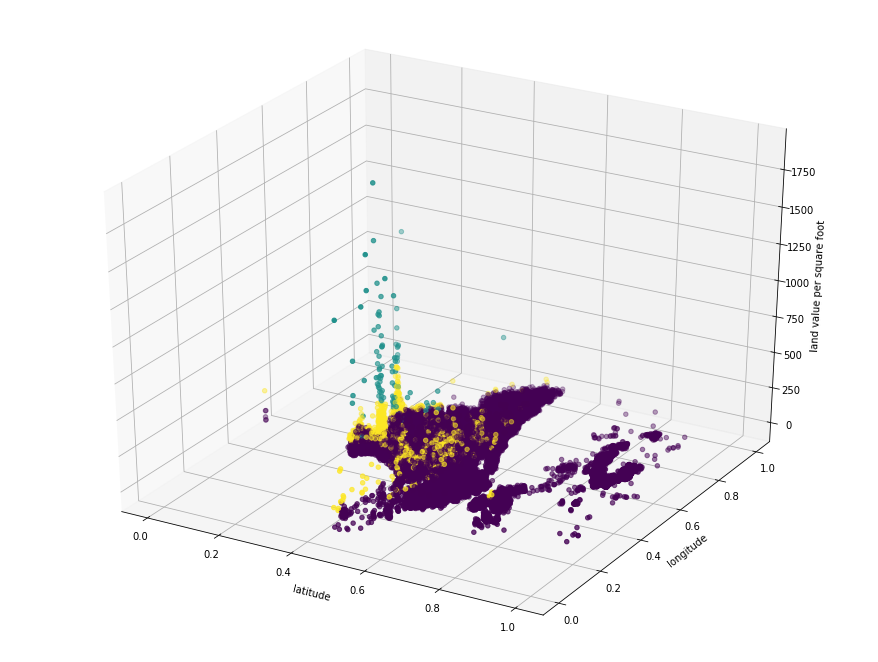

In [45]:
X = train[['land_value_square_footage', 'longitude', 'latitude']]

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

centers = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
print(kmeans.cluster_centers_)

%matplotlib inline

fig = plt.figure(figsize=(12, 9))
ax = Axes3D(fig)

ax.scatter(X.latitude,X.longitude,X.land_value_square_footage, c=kmeans.labels_)
ax.set(xlabel='latitude', ylabel='longitude', zlabel='land value per square foot')

train['cluster'] = kmeans.labels_

train.groupby('cluster').describe()

[[1.76857322e+01 5.42379172e-01 5.51687157e-01]
 [2.52708676e+02 4.05271974e-01 4.47797836e-01]
 [7.82621757e+01 4.91272671e-01 4.66969976e-01]
 [9.01535908e+02 3.44311632e-01 3.99222303e-01]]


target                                                              \
           count      mean       std       min       25%       50%       75%   
cluster                                                                        
0        19777.0  0.018363  0.162770 -2.271428 -0.028841  0.006054  0.041704   
1          777.0  0.003660  0.248899 -2.175696 -0.032466  0.014583  0.054835   
2         6310.0  0.006733  0.173664 -4.655420 -0.030372  0.005909  0.041140   
3           48.0  0.021690  0.155048 -0.430161 -0.046968  0.018875  0.072510   

                      fips               ... land_value           tax_amount  \
              max    count         mean  ...        75%       max      count   
cluster                                  ...                                   
0        3.394544  19777.0  6037.003337  ...   0.559415  0.991891    19777.0   
1        5.262999    777.0  6037.000000  ...   0.983479  0.997971      777.0   
2        3.175688   6310.0  6037.003487  ...   0.901496  0.994565     6310.0   
3        0.664921     48.0  6037.458333  ...   0.991232  1.000000       48.0   

                                                                               
             mean       std       min       25%       50%       75%       max  
cluster                                                                        
0        0.398121  0.254705  0.000000  0.183764  0.372242  0.582781  0.994397  
1        0.934761  0.080982  0.190071  0.924551  0.962193  0.982438  0.999529  
2        0.761976  0.157363  0.002316  0.664287  0.782687  0.888638  0.997408  
3        0.978813  0.019695  0.912794  0.968104  0.989947  0.991219  1.000000  

[4 rows x 120 columns]

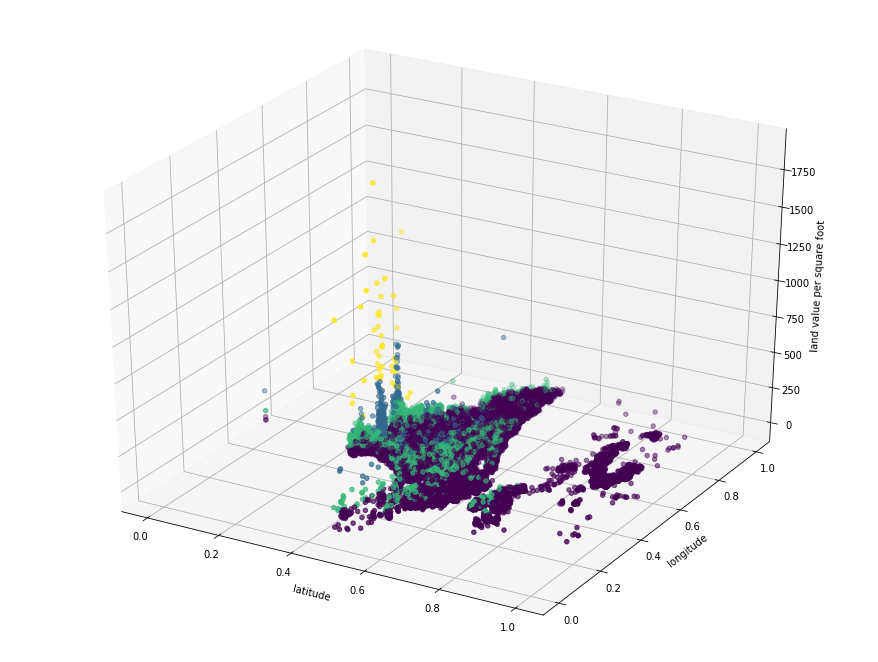

In [46]:
X = train[['land_value_square_footage', 'longitude', 'latitude']]

kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

centers = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
print(kmeans.cluster_centers_)

%matplotlib inline

fig = plt.figure(figsize=(12, 9))
ax = Axes3D(fig)

ax.scatter(X.latitude,X.longitude,X.land_value_square_footage, c=kmeans.labels_)
ax.set(xlabel='latitude', ylabel='longitude', zlabel='land value per square foot')

train['cluster'] = kmeans.labels_

train.groupby('cluster').describe()

[[5.87250936e+01 5.10226958e-01 4.76475471e-01]
 [1.36054450e+01 5.45571761e-01 5.61873550e-01]
 [3.54860515e+02 3.91724610e-01 4.29130325e-01]
 [1.02734110e+03 3.30690528e-01 3.99768232e-01]
 [1.52994442e+02 4.25945138e-01 4.60288897e-01]]


target                                                              \
           count      mean       std       min       25%       50%       75%   
cluster                                                                        
0         8151.0  0.010653  0.151224 -2.331727 -0.027291  0.005931  0.039577   
1        16890.0  0.018801  0.165539 -2.271428 -0.029269  0.006010  0.042112   
2          301.0  0.004209  0.212650 -2.175696 -0.025997  0.020871  0.064884   
3           33.0  0.008200  0.097141 -0.205920 -0.044590  0.019148  0.063555   
4         1537.0  0.002346  0.255719 -4.655420 -0.042345  0.008874  0.049075   

                      fips               ... land_value           tax_amount  \
              max    count         mean  ...        75%       max      count   
cluster                                  ...                                   
0        3.175688   8151.0  6037.005398  ...   0.846094  0.991891     8151.0   
1        3.394544  16890.0  6037.001303  ...   0.479421  0.991768    16890.0   
2        1.310249    301.0  6037.000000  ...   0.989968  0.997971      301.0   
3        0.273869     33.0  6037.666667  ...   0.991449  1.000000       33.0   
4        5.262999   1537.0  6037.014314  ...   0.966861  0.994565     1537.0   

                                                                               
             mean       std       min       25%       50%       75%       max  
cluster                                                                        
0        0.698119  0.169781  0.079443  0.580005  0.711503  0.830019  0.993300  
1        0.359472  0.246233  0.000000  0.157878  0.320191  0.520219  0.994397  
2        0.955809  0.061448  0.190071  0.946523  0.973564  0.988887  0.999529  
3        0.982985  0.017279  0.930036  0.985499  0.990244  0.991407  1.000000  
4        0.893304  0.111159  0.002316  0.865838  0.926148  0.964161  0.997408  

[5 rows x 120 columns]

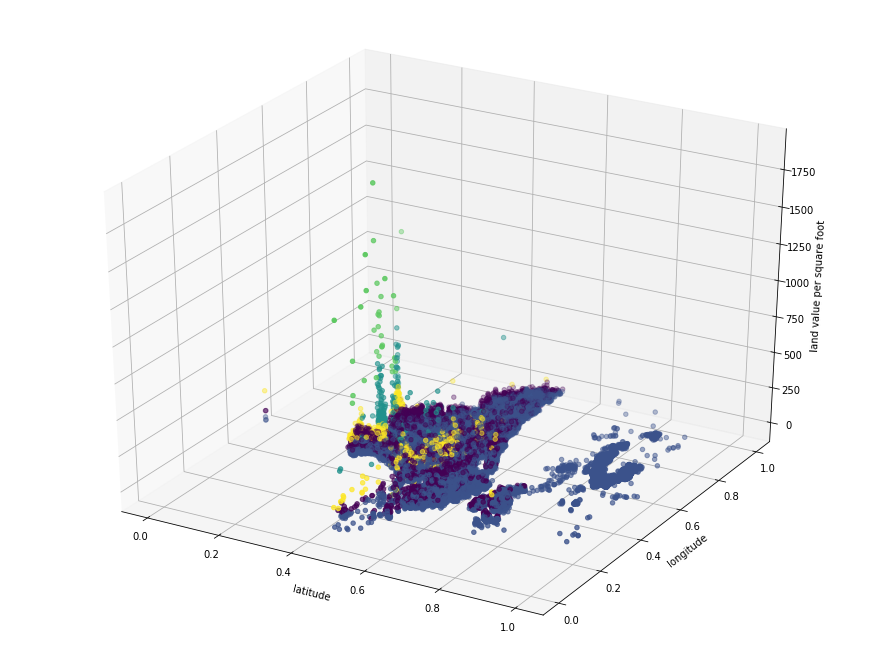

In [47]:
X = train[['land_value_square_footage', 'longitude', 'latitude']]

kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

centers = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
print(kmeans.cluster_centers_)

%matplotlib inline

fig = plt.figure(figsize=(12, 9))
ax = Axes3D(fig)

ax.scatter(X.latitude,X.longitude,X.land_value_square_footage, c=kmeans.labels_)
ax.set(xlabel='latitude', ylabel='longitude', zlabel='land value per square foot')

train['cluster'] = kmeans.labels_

train.groupby('cluster').describe()

In [48]:
X = train[['land_value_square_footage', 'longitude', 'latitude','home_value_square_footage']]

kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

centers = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
print(kmeans.cluster_centers_)

train['cluster'] = kmeans.labels_

train.groupby('cluster').describe()

[[1.62650661e+01 5.53264434e-01 5.39939439e-01 5.32819213e+01]
 [1.71666908e+02 4.20258720e-01 4.61636854e-01 1.95203154e+02]
 [4.50183923e+01 5.10432320e-01 5.25189819e-01 1.14449919e+02]
 [2.18737700e+02 3.62559693e-01 4.74384460e-01 5.40619558e+02]
 [8.42879633e+02 3.71535323e-01 3.90696381e-01 2.77097443e+02]]


target                                                              \
           count      mean       std       min       25%       50%       75%   
cluster                                                                        
0        13795.0  0.021267  0.175858 -2.331727 -0.030090  0.006829  0.045272   
1         1578.0  0.005928  0.210761 -0.976064 -0.037360  0.008497  0.050837   
2        11333.0  0.009512  0.147628 -4.655420 -0.027172  0.005032  0.036397   
3          149.0 -0.012127  0.349278 -2.175696 -0.052796  0.022360  0.076803   
4           57.0  0.014240  0.157799 -0.430161 -0.054102  0.018603  0.074126   

                      fips               ... land_value           tax_amount  \
              max    count         mean  ...        75%       max      count   
cluster                                  ...                                   
0        3.394544  13795.0  6037.004784  ...   0.474124  0.984254    13795.0   
1        5.262999   1578.0  6037.000000  ...   0.973659  0.997971     1578.0   
2        3.175688  11333.0  6037.001941  ...   0.820185  0.992139    11333.0   
3        2.069414    149.0  6037.000000  ...   0.990161  0.997010      149.0   
4        0.664921     57.0  6037.385965  ...   0.991040  1.000000       57.0   

                                                                               
             mean       std       min       25%       50%       75%       max  
cluster                                                                        
0        0.301911  0.212553  0.000000  0.128465  0.264151  0.438511  0.990766  
1        0.919820  0.089967  0.002316  0.902308  0.946133  0.973116  0.997639  
2        0.673990  0.186721  0.005995  0.538579  0.696190  0.826089  0.991486  
3        0.971143  0.080238  0.079443  0.976265  0.989984  0.990795  0.999529  
4        0.975745  0.024471  0.860021  0.965384  0.988705  0.991075  1.000000  

[5 rows x 120 columns]

In [49]:
X = train[['land_value_square_footage', 'longitude', 'latitude','home_value_square_footage']]

kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

centers = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
print(kmeans.cluster_centers_)

train['cluster'] = kmeans.labels_

train.groupby('cluster').describe()

[[1.63330724e+01 5.53208276e-01 5.39924544e-01 5.34284490e+01]
 [1.72480675e+02 4.19466000e-01 4.61490938e-01 1.95503430e+02]
 [8.42879633e+02 3.71535323e-01 3.90696381e-01 2.77097443e+02]
 [4.51714679e+01 5.10240786e-01 5.25061877e-01 1.14707681e+02]
 [2.18098139e+02 3.62138724e-01 4.74124785e-01 5.41887206e+02]]


target                                                              \
           count      mean       std       min       25%       50%       75%   
cluster                                                                        
0        13865.0  0.021227  0.175528 -2.331727 -0.030014  0.006809  0.045240   
1         1564.0  0.005710  0.211372 -0.976064 -0.037386  0.008372  0.050710   
2           57.0  0.014240  0.157799 -0.430161 -0.054102  0.018603  0.074126   
3        11278.0  0.009519  0.147888 -4.655420 -0.027187  0.005041  0.036502   
4          148.0 -0.012690  0.350396 -2.175696 -0.053812  0.021616  0.077476   

                      fips               ... land_value           tax_amount  \
              max    count         mean  ...        75%       max      count   
cluster                                  ...                                   
0        3.394544  13865.0  6037.004760  ...   0.476142  0.984254    13865.0   
1        5.262999   1564.0  6037.000000  ...   0.973671  0.997971     1564.0   
2        0.664921     57.0  6037.385965  ...   0.991040  1.000000       57.0   
3        3.175688  11278.0  6037.001951  ...   0.820955  0.992139    11278.0   
4        2.069414    148.0  6037.000000  ...   0.990186  0.997010      148.0   

                                                                               
             mean       std       min       25%       50%       75%       max  
cluster                                                                        
0        0.303115  0.213058  0.000000  0.129198  0.265448  0.440037  0.990766  
1        0.920337  0.089805  0.002316  0.902988  0.946502  0.973413  0.997639  
2        0.975745  0.024471  0.860021  0.965384  0.988705  0.991075  1.000000  
3        0.675081  0.186525  0.005995  0.540216  0.697120  0.827303  0.991486  
4        0.971016  0.080496  0.079443  0.975956  0.989995  0.990805  0.999529  

[5 rows x 120 columns]

In [51]:
train = train.drop(columns=['cluster'])


   k           sse
0  1  2.156597e+08
1  2  1.328530e+08
2  3  9.908192e+07
3  4  7.820175e+07
4  5  6.368934e+07
5  6  5.350861e+07
6  7  4.565463e+07
7  8  3.894279e+07
8  9  3.372494e+07


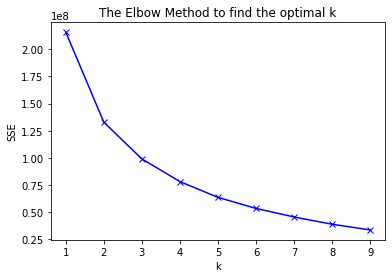

In [52]:
ks = range(1,10)
sse = []
for k in ks:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(train)

    # inertia: Sum of squared distances of samples to their closest cluster center.
    sse.append(kmeans.inertia_)

print(pd.DataFrame(dict(k=ks, sse=sse)))

plt.plot(ks, sse, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('The Elbow Method to find the optimal k')
plt.show()

In [53]:
X = train

kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

centers = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
print(kmeans.cluster_centers_)

train['cluster'] = kmeans.labels_

train.groupby('cluster').describe()


[[ 2.13588195e-02  6.03700489e+03  5.25296238e+01  1.60451548e+01
   4.45502602e-01  5.39311044e-01  5.53220700e-01  4.07088682e-01
   4.75439652e-01  4.49044336e-01  4.94755181e-01  3.08206642e-01
   2.94114764e-01  3.16671337e-01  2.97456141e-01]
 [ 9.87938991e-03  6.03700190e+03  1.13454984e+02  4.41680378e+01
   3.99842673e-01  5.26553993e-01  5.11900377e-01  5.18570004e-01
   5.22242396e-01  5.33214416e-01  5.16941649e-01  6.65837647e-01
   6.71710510e-01  6.45054502e-01  6.68747488e-01]
 [-9.27102362e-03  6.03700000e+03  5.27636610e+02  2.15074875e+02
   3.98235665e-01  4.75329270e-01  3.60538190e-01  6.95042707e-01
   6.07302842e-01  7.14240266e-01  6.18408350e-01  9.77704925e-01
   9.76147692e-01  9.59748268e-01  9.70649975e-01]
 [ 1.42397474e-02  6.03738596e+03  2.77097443e+02  8.42879633e+02
   2.93668955e-01  3.90696381e-01  3.71535323e-01  8.04827726e-01
   5.94364700e-01  8.02042019e-01  1.43527886e-01  9.40318823e-01
   9.78049429e-01  9.80810839e-01  9.75744657e-01]
 [ 4

target                                                              \
           count      mean       std       min       25%       50%       75%   
cluster                                                                        
0        13512.0  0.021357  0.173419 -2.271428 -0.030194  0.006839  0.045281   
1        11558.0  0.009870  0.151810 -4.655420 -0.026722  0.005134  0.036526   
2          161.0 -0.009271  0.336814 -2.175696 -0.052449  0.022360  0.076803   
3           57.0  0.014240  0.157799 -0.430161 -0.054102  0.018603  0.074126   
4         1624.0  0.004649  0.208919 -0.976064 -0.038623  0.008190  0.050507   

                      fips               ... land_value           tax_amount  \
              max    count         mean  ...        75%       max      count   
cluster                                  ...                                   
0        3.100913  13512.0  6037.004885  ...   0.468752  0.984254    13512.0   
1        3.394544  11558.0  6037.001903  ...   0.816110  0.992139    11558.0   
2        2.069414    161.0  6037.000000  ...   0.990146  0.997010      161.0   
3        0.664921     57.0  6037.385965  ...   0.991040  1.000000       57.0   
4        5.262999   1624.0  6037.000000  ...   0.972941  0.997971     1624.0   

                                                                               
             mean       std       min       25%       50%       75%       max  
cluster                                                                        
0        0.297639  0.211103  0.000000  0.125510  0.258592  0.432153  0.990766  
1        0.668849  0.188085  0.005995  0.531849  0.689892  0.821821  0.991486  
2        0.970650  0.078726  0.079443  0.975026  0.989979  0.990760  0.999529  
3        0.975745  0.024471  0.860021  0.965384  0.988705  0.991075  1.000000  
4        0.918010  0.090764  0.002316  0.899480  0.944647  0.972539  0.997639  

[5 rows x 120 columns]

In [54]:
X = train

kmeans = KMeans(n_clusters=6)
kmeans.fit(X)

centers = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
print(kmeans.cluster_centers_)

train['cluster'] = kmeans.labels_

train.groupby('cluster').describe()

[[ 2.33253017e-02  6.03700231e+03  4.27284822e+01  1.17321079e+01
   4.63526154e-01  5.27257743e-01  5.49436117e-01  3.83535626e-01
   4.61346201e-01  4.34140760e-01  4.86427301e-01  2.35624715e-01
   2.20364487e-01  2.51428119e-01  2.24220350e-01  1.44773082e-13]
 [-1.05299410e-02  6.03700000e+03  5.34284294e+02  2.08175361e+02
   3.96259935e-01  4.75669212e-01  3.62843218e-01  6.93860262e-01
   5.97673509e-01  7.11604147e-01  6.21494454e-01  9.78196172e-01
   9.75053020e-01  9.56251175e-01  9.69294777e-01  2.01290323e+00]
 [ 8.11515335e-03  6.03700000e+03  1.89701314e+02  2.30851666e+02
   4.40562457e-01  4.49643862e-01  4.10874601e-01  6.51439566e-01
   5.46726792e-01  6.70834121e-01  3.29612332e-01  8.45900198e-01
   9.35039955e-01  9.45231917e-01  9.30263037e-01  3.97380952e+00]
 [ 2.05588144e-02  6.03746809e+03  2.91905417e+02  9.07539243e+02
   3.04347826e-01  3.97788410e-01  3.48436959e-01  8.08096159e-01
   6.03374167e-01  8.01814929e-01  1.53450484e-01  9.40113120e-01
   9.80

target                                                              \
           count      mean       std       min       25%       50%       75%   
cluster                                                                        
0         9532.0  0.023319  0.184585 -2.271428 -0.032083  0.007862  0.049257   
1          155.0 -0.010530  0.342302 -2.175696 -0.051986  0.020871  0.072990   
2          840.0  0.008115  0.228865 -0.860147 -0.034724  0.013426  0.054631   
3           47.0  0.020559  0.156524 -0.430161 -0.049346  0.018603  0.068481   
4         3455.0  0.002984  0.157263 -1.738639 -0.034097  0.005597  0.043556   
5        12883.0  0.013257  0.149928 -4.655420 -0.025975  0.004899  0.036030   

                      fips               ... land_value           tax_amount  \
              max    count         mean  ...        75%       max      count   
cluster                                  ...                                   
0        3.100913   9532.0  6037.002308  ...   0.366849  0.984254     9532.0   
1        2.069414    155.0  6037.000000  ...   0.990144  0.997010      155.0   
2        5.262999    840.0  6037.000000  ...   0.980460  0.997971      840.0   
3        0.664921     47.0  6037.468085  ...   0.991304  1.000000       47.0   
4        2.591723   3455.0  6037.000000  ...   0.924289  0.991804     3455.0   
5        3.394544  12883.0  6037.005123  ...   0.745087  0.992139    12883.0   

                                                                               
             mean       std       min       25%       50%       75%       max  
cluster                                                                        
0        0.224269  0.178131  0.000000  0.088320  0.181187  0.317072  0.973109  
1        0.969295  0.080869  0.079443  0.974664  0.989979  0.990765  0.999529  
2        0.930263  0.079521  0.190071  0.918620  0.956584  0.977474  0.997639  
3        0.978555  0.019826  0.912794  0.967738  0.989942  0.991281  1.000000  
4        0.825310  0.144006  0.002316  0.758961  0.868369  0.931817  0.993276  
5        0.581244  0.193907  0.005995  0.430533  0.586218  0.736816  0.991486  

[6 rows x 120 columns]

In [55]:
train.columns

Index(['target', 'fips', 'home_value_square_footage',
       'land_value_square_footage', 'age', 'latitude', 'longitude', 'bathroom',
       'bedroom', 'home_square_feet', 'lot_square_feet', 'structure_value',
       'total_value', 'land_value', 'tax_amount', 'cluster'],
      dtype='object')

In [56]:
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from math import sqrt

def regression_errors(y, yhat, data_frame):
    # SSE - sum of squared errors using MSE * len()
    SSE = mean_squared_error(y, X_train.yhat) * len(X_train)
    # MSE - mean of squared errors
    MSE = mean_squared_error(y, X_train.yhat)
    # ESS - explained sum of squares
    ESS = sum((X_train.yhat - train.target.mean()) ** 2)
    # TSS - total sum of squares
    TSS = SSE + ESS
    # RMSE - root mean squared error
    RMSE = sqrt(MSE)
    print("SSE: ", SSE, "EES: ", ESS, "TSS: ", TSS, "MSE: ", MSE, "RMSE: ", RMSE)
    return SSE, ESS, TSS, MSE, RMSE

In [57]:
# Create linear model
X_train = pd.DataFrame(train.drop(columns=['target','cluster']))
y_train = pd.DataFrame(train.target)

In [59]:
# Baseline Everything
x = pd.DataFrame(train.drop(columns=['target','cluster']))
y = pd.DataFrame(train.target)

regr = ols('y ~ x', data = train).fit()

X_train['yhat'] = regr.predict(x)

#regr.summary()

In [60]:
SSE, ESS, TSS, MSE, RMSE = regression_errors(y, X_train.yhat, train)

SSE:  761.194489257288 EES:  2.988526771006045 TSS:  764.183016028294 MSE:  0.0282845752548041 RMSE:  0.16818018686755018


In [61]:
# Baseline Everything except 'home_value_square_footage', 'land_value_square_footage'
x = pd.DataFrame(X_train.drop(columns = ['home_value_square_footage', 'land_value_square_footage', 'absolute_target']))
y = pd.DataFrame(train.target) 

regr = ols('y ~ x', data = train).fit()
X_train['yhat'] = regr.predict(x)

#regr.summary()

KeyError: "['absolute_target'] not found in axis"

In [62]:
SSE, ESS, TSS, MSE, RMSE = regression_errors(y, X_train.yhat, train)

SSE:  761.194489257288 EES:  2.988526771006045 TSS:  764.183016028294 MSE:  0.0282845752548041 RMSE:  0.16818018686755018


In [ ]:
# Baseline Everything including 'home_value_square_footage', 'land_value_square_footage'
# Except removing 4 columns that calulated: columns = 'home_value_square_footage', 'land_value_square_footage'
x = pd.DataFrame(X_train.drop(columns = ['structure_value', 'lot_square_feet', 'home_square_feet', 'land_value','absolute_target']))
y = pd.DataFrame(train.target) 

regr = ols('y ~ x', data = train).fit()
X_train['yhat'] = regr.predict(x)

#regr.summary()

In [ ]:
SSE, ESS, TSS, MSE, RMSE = regression_errors(y, X_train.yhat, train)

In [ ]:
# Baseline of only created features: 'home_value_square_footage', 'land_value_square_footage')
x = X_train[['home_value_square_footage', 'land_value_square_footage']]
y = pd.DataFrame(train.target) 

regr = ols('y ~ x', data = train).fit()
X_train['yhat'] = regr.predict(x)

#regr.summary()

In [ ]:
SSE, ESS, TSS, MSE, RMSE = regression_errors(y, X_train.yhat, train)

**Absolute**

In [ ]:
# Baseline Everything
x = pd.DataFrame(train.drop(columns=['target','absolute_target','cluster']))
y = pd.DataFrame(train.absolute_target)

regr = ols('y ~ x', data = train).fit()

X_train['yhat'] = regr.predict(x)

#regr.summary()

In [ ]:
SSE, ESS, TSS, MSE, RMSE = regression_errors(y, X_train.yhat, train)

In [ ]:
# Baseline Everything except 'home_value_square_footage', 'land_value_square_footage'
x = pd.DataFrame(X_train.drop(columns = ['home_value_square_footage', 'land_value_square_footage', 'absolute_target']))
y = pd.DataFrame(train.absolute_target) 

regr = ols('y ~ x', data = train).fit()
X_train['yhat'] = regr.predict(x)

#regr.summary()

In [ ]:
SSE, ESS, TSS, MSE, RMSE = regression_errors(y, X_train.yhat, train)

In [ ]:
# Baseline Everything including 'home_value_square_footage', 'land_value_square_footage'
# Except removing 4 columns that calulated: columns = 'home_value_square_footage', 'land_value_square_footage'
x = pd.DataFrame(X_train.drop(columns = ['structure_value', 'lot_square_feet', 'home_square_feet', 'land_value','absolute_target']))
y = pd.DataFrame(train.absolute_target) 

regr = ols('y ~ x', data = train).fit()
X_train['yhat'] = regr.predict(x)

#regr.summary()

In [ ]:
SSE, ESS, TSS, MSE, RMSE = regression_errors(y, X_train.yhat, train)

In [ ]:
# Baseline of only created features: 'home_value_square_footage', 'land_value_square_footage')
x = X_train[['home_value_square_footage', 'land_value_square_footage']]
y = pd.DataFrame(train.absolute_target) 

regr = ols('y ~ x', data = train).fit()
X_train['yhat'] = regr.predict(x)

#regr.summary()

In [ ]:
SSE, ESS, TSS, MSE, RMSE = regression_errors(y, X_train.yhat, train)

**Cluster on target**

In [ ]:
ks = range(1,10)
sse = []
for k in ks:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(train[['target']])

    # inertia: Sum of squared distances of samples to their closest cluster center.
    sse.append(kmeans.inertia_)

print(pd.DataFrame(dict(k=ks, sse=sse)))

plt.plot(ks, sse, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('The Elbow Method to find the optimal k')
plt.show()

In [ ]:
X = train[['target']]

kmeans = KMeans(n_clusters=6)
kmeans.fit(X)

centers = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)

train['cluster'] = kmeans.labels_

train.groupby('cluster').describe()

In [ ]:
train[train.cluster == 0].describe()